In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy
# from ResPAN import run_respan

In [2]:
from respan import run_respan

In [5]:
# data loading
adata = sc.read_loom('datasets/CL/CL_raw.loom', sparse=False) 
# pre-processing
# sc.pp.filter_cells(adata, min_genes=200)
# sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key='batch')
adata = adata[:, adata.var['highly_variable']]
# check if data is in sparse format
if isinstance(adata.X, scipy.sparse.csr.csr_matrix): 
    adata_new = sc.AnnData(adata.X.todense())
    adata_new.obs = adata.obs.copy()
    adata_new.obs_names = adata.obs_names
    adata_new.var_names = adata.var_names
    adata_new.obs_names.name = 'CellID'
    adata_new.var_names.name = 'Gene'
    del adata
    adata = adata_new

/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'batch' as categorical
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

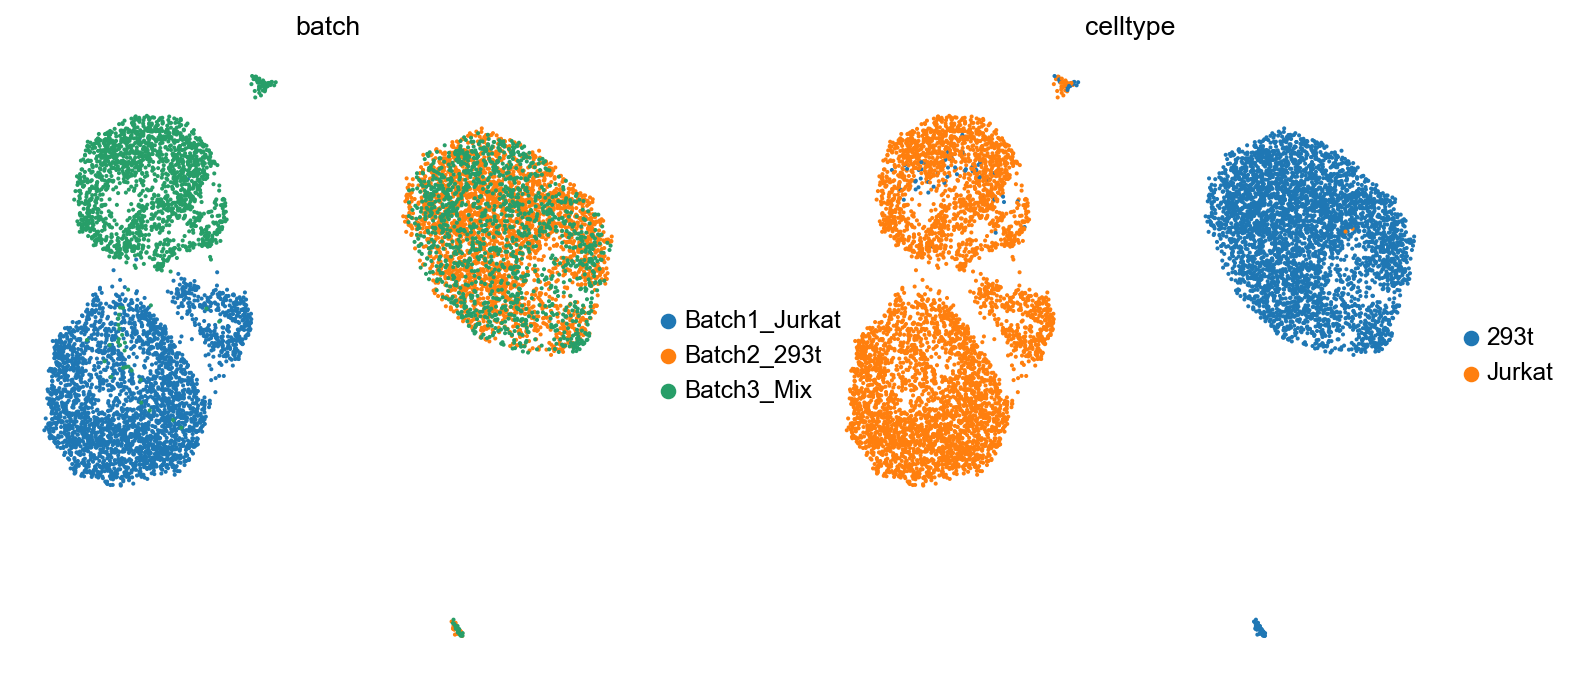

In [6]:
# Plot raw data
adata_raw = adata.copy() # Make a copy of the raw data, because scaling will be done for UMAP, but it's not needed for running ResPAN
adata_raw.raw = adata_raw
sc.pp.scale(adata_raw, max_value=10)
sc.tl.pca(adata_raw, 20, svd_solver='arpack')
sc.pp.neighbors(adata_raw)
sc.tl.umap(adata_raw)
sc.set_figure_params(figsize=(5,5),fontsize=12)
sc.pl.umap(adata_raw, color=['batch', 'celltype'], frameon=False)

In [9]:
# Run ResPAN on raw data
adata_new = run_respan(adata, batch_key='batch', epoch=300, batch=1024, reduction='pca', subsample=3000, seed=999)

The sequential mapping order will be:  Batch3_Mix->Batch1_Jurkat->Batch2_293t
########################## Mapping Batch1_Jurkat to the reference data #####################


/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Calculating reference pairs...
Calculating query pairs...
Calculating kNN pairs...
Number of MNN pairs is 7348
Calculating random walk MNN (rwMNN) Pairs...
Number of rwMNN pairs is 367400.
Done.
Dimension of paired data is 367400.
######################## Finish pair finding ########################
Start adversarial training...
This is epoch:  0
d step loss:  tensor(7.4052, device='cuda:0', grad_fn=<AddBackward0>)
g step loss:  tensor(-0.0054, device='cuda:0', grad_fn=<NegBackward0>)
This is epoch:  50
d step loss:  tensor(-2.3828, device='cuda:0', grad_fn=<AddBackward0>)
g step loss:  tensor(0.5977, device='cuda:0', grad_fn=<NegBackward0>)
This is epoch:  100
d step loss:  tensor(-3.5304, device='cuda:0', grad_fn=<AddBackward0>)
g step loss:  tensor(-4.3599, device='cuda:0', grad_fn=<NegBackward0>)
This is epoch:  150
d step loss:  tensor(-3.3573, device='cuda:0', grad_fn=<AddBackward0>)
g step loss:  tensor(-2.6750, device='cuda:0', grad_fn=<NegBackward0>)
This is epoch:  200
d step

/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Calculating reference pairs...
Calculating query pairs...
Calculating kNN pairs...
Number of MNN pairs is 6894
Calculating random walk MNN (rwMNN) Pairs...
Number of rwMNN pairs is 344700.
Done.
Dimension of paired data is 344700.
######################## Finish pair finding ########################
Start adversarial training...
This is epoch:  0
d step loss:  tensor(7.8241, device='cuda:0', grad_fn=<AddBackward0>)
g step loss:  tensor(-0.0744, device='cuda:0', grad_fn=<NegBackward0>)
This is epoch:  50
d step loss:  tensor(-1.2896, device='cuda:0', grad_fn=<AddBackward0>)
g step loss:  tensor(-2.8282, device='cuda:0', grad_fn=<NegBackward0>)
This is epoch:  100
d step loss:  tensor(-3.5549, device='cuda:0', grad_fn=<AddBackward0>)
g step loss:  tensor(-12.2431, device='cuda:0', grad_fn=<NegBackward0>)
This is epoch:  150
d step loss:  tensor(-1.8903, device='cuda:0', grad_fn=<AddBackward0>)
g step loss:  tensor(-10.2107, device='cuda:0', grad_fn=<NegBackward0>)
This is epoch:  200
d s

/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'batch' as categorical
/gpfs/gibbs/pi/zhao/yw599/venv/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'celltype' as categorical


[<AxesSubplot:title={'center':'batch'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <AxesSubplot:title={'center':'celltype'}, xlabel='UMAP1', ylabel='UMAP2'>]

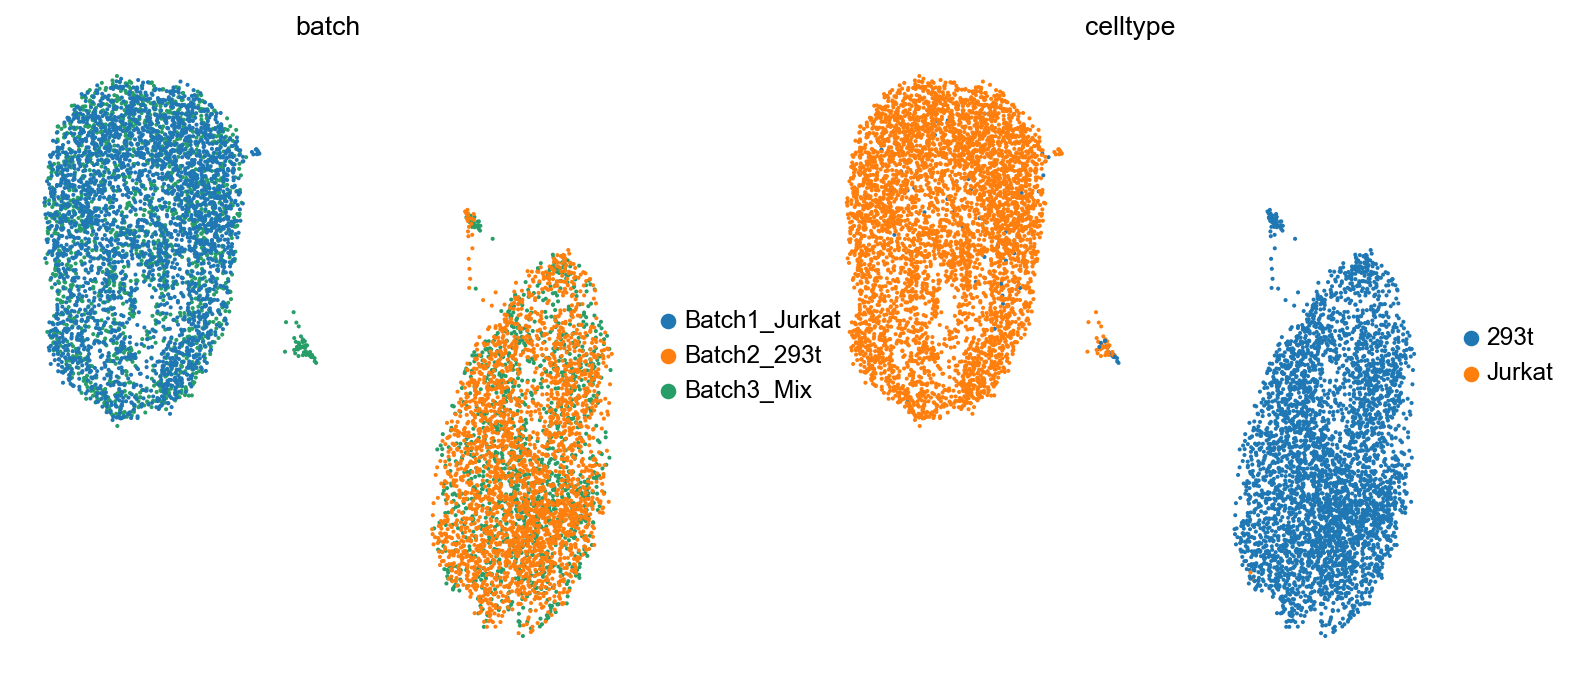

In [10]:
adata_new.raw = adata_new
sc.pp.scale(adata_new, max_value=10)
sc.tl.pca(adata_new, 20, svd_solver='arpack')
sc.pp.neighbors(adata_new)
sc.tl.umap(adata_new)
sc.set_figure_params(figsize=(5,5),fontsize=12)
sc.pl.umap(adata_new, color=['batch', 'celltype'], frameon=False, show=False)